# EDA Case Study II -
Supermarket Sales
Analysis

In [1]:
import warnings
import pandas as pd
import numpy as np
from datetime import date
import datetime as date
import seaborn as sns
import matplotlib.pyplot as plt
import folium

    warnings.filterwarnings('ignore')

df1 = pd.read_csv(r'D:\Casestudy\supermarket_sales.csv')

df2 = pd.read_csv(r'D:\Casestudy\data_dict.csv')
df =pd.DataFrame(df1)
data_dict = pd.DataFrame(df2)
display(data_dict)
df.head(10)

,Field,Description
0,Invoice ID,Invoice ID of the transaction
1,Branch,One out of 3 branches. Every city belongs to a...
2,CustomerID,Customer ID of the cutomer doing transaction
3,City,City where the tx took place. The chain has st...
4,Customer Type,Where a member or normal customer
5,Gender,Male or Female
6,Product Line,Product line of the product purchased
7,Unit Price,Unit price of product purchased
8,Quantity,Qty purchased
9,Tax 5%,Tax as a fixed % of invoice


,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409
5,699-14-3026,C,C1423,Naypyitaw,Normal,Male,Health and beauty,85.39,8,34.1560,683.12,06-01-2019,18:30,Ewallet,597.730000,4.761905,85.390000,NaN,96.0785,19.7633
6,355-53-5943,A,C1723,Yangon,Normal,Female,Health and beauty,68.84,6,20.6520,413.04,15-12-2019,14:36,Ewallet,413.040000,4.761905,0.000000,NaN,96.1735,16.8409
7,315-22-5665,C,C1471,Naypyitaw,NaN,Female,Health and beauty,73.56,12,44.1360,882.72,14-06-2019,11:38,Ewallet,735.600000,4.761905,147.120000,NaN,96.0785,19.7633
8,665-32-9167,A,C1707,Yangon,NaN,Female,Health and beauty,36.26,2,3.6260,72.52,25-11-2019,17:15,Credit card,72.520000,4.761905,0.000000,NaN,96.1735,16.8409
9,692-92-5582,B,C1277,Mandalay,NaN,Female,Health and beauty,54.84,4,10.9680,219.36,10-04-2019,13:27,Credit card,164.520000,4.761905,54.840000,NaN,96.0891,21.9588


In [2]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   806 non-null    object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            952 non-null    object 
 5   Gender                   975 non-null    object 
 6   Product line             977 non-null    object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   896 non-null    float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  979 non-null    object 
 14  cogs                     

In [4]:
df.isnull().sum()

Invoice ID                   0
Branch                     194
CustomerID                   0
City                         0
Customer type               48
Gender                      25
Product line                23
Unit price                   0
Quantity                     0
Tax 5%                     104
Total                        0
Date                         0
Time                         0
Payment                     21
cogs                         0
gross margin percentage      0
gross income                 0
Rating                     143
Longitude                    0
Latitude                     0
dtype: int64

In [1]:
df.head(20).style.background_gradient(cmap='GnBu')
#df.describe().style.background_gradient(cmap = 'GnBu')

NameError: name 'df' is not defined

In [6]:
#Data Cleaning

#imputing nulls for rating

null_perc = df.isnull().sum()/len(df)*100
null_perc.sort_values(ascending = False)

Branch                     19.4
Rating                     14.3
Tax 5%                     10.4
Customer type               4.8
Gender                      2.5
Product line                2.3
Payment                     2.1
Invoice ID                  0.0
Longitude                   0.0
gross income                0.0
gross margin percentage     0.0
cogs                        0.0
Total                       0.0
Time                        0.0
Date                        0.0
Quantity                    0.0
Unit price                  0.0
City                        0.0
CustomerID                  0.0
Latitude                    0.0
dtype: float64

In [7]:
sales_data_2 = df.copy()
sales_data_2.Rating.mean()
display(sales_data_2)
df1.Rating.sum()

df1['Rating'] = df1['Rating'].fillna(df1.Rating.mean())

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.10,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.00,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.40,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.40,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,C1451,Naypyitaw,Normal,Male,Fashion accessories,40.35,1,2.0175,40.35,02-10-2019,13:46,Ewallet,40.350000,4.761905,0.000000,6.51,96.0785,19.7633
996,303-96-2227,B,C1204,Mandalay,Normal,Female,Fashion accessories,97.38,14,68.1660,1363.32,29-12-2019,17:16,Ewallet,973.800000,4.761905,389.520000,5.28,96.0891,21.9588
997,727-02-1313,A,C1678,Yangon,Member,Male,Fashion accessories,31.84,1,1.5920,31.84,16-01-2019,13:22,Cash,31.840000,4.761905,0.000000,7.70,96.1735,16.8409
998,347-56-2442,A,C1661,Yangon,Normal,Male,Fashion accessories,65.82,1,3.2910,65.82,21-03-2019,15:33,Cash,65.820000,4.761905,0.000000,4.10,96.1735,16.8409


In [8]:
#imputing NUlls for Tax

taxperc = df1['Tax 5%']*100/df['Total']
taxperc

df1['Tax 5%'] = df1['Tax 5%'].fillna(df1['Total']*0.5)


In [9]:

df1.head(20).style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.690000,10,37.345000,746.900000,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.173500,16.840900
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.280000,6,4.584000,91.680000,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.078500,19.763300
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.330000,7,16.215500,324.310000,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.173500,16.840900
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.220000,11,32.021000,640.420000,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.173500,16.840900
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.310000,7,30.208500,604.170000,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,7.462625,96.173500,16.840900
5,699-14-3026,C,C1423,Naypyitaw,Normal,Male,Health and beauty,85.390000,8,34.156000,683.120000,06-01-2019,18:30,Ewallet,597.730000,4.761905,85.390000,7.462625,96.078500,19.763300
6,355-53-5943,A,C1723,Yangon,Normal,Female,Health and beauty,68.840000,6,20.652000,413.040000,15-12-2019,14:36,Ewallet,413.040000,4.761905,0.000000,7.462625,96.173500,16.840900
7,315-22-5665,C,C1471,Naypyitaw,nan,Female,Health and beauty,73.560000,12,44.136000,882.720000,14-06-2019,11:38,Ewallet,735.600000,4.761905,147.120000,7.462625,96.078500,19.763300
8,665-32-9167,A,C1707,Yangon,nan,Female,Health and beauty,36.260000,2,3.626000,72.520000,25-11-2019,17:15,Credit card,72.520000,4.761905,0.000000,7.462625,96.173500,16.840900
9,692-92-5582,B,C1277,Mandalay,nan,Female,Health and beauty,54.840000,4,10.968000,219.360000,10-04-2019,13:27,Credit card,164.520000,4.761905,54.840000,7.462625,96.089100,21.958800


In [10]:
def impute_mode(col):
    print("The mode of this field is :  " + sales_data_2[col].mode()[0])
    df1[col] = df1[col].fillna(df1[col].mode()[0])
    print("Mode Value Imputed")

In [11]:
impute_mode('Payment')

The mode of this field is :  Ewallet
Mode Value Imputed


In [12]:
impute_mode('Customer type')

The mode of this field is :  Normal
Mode Value Imputed


In [13]:
col = 'Payment'
print("The mode of this field is :  " + sales_data_2[col].mode()[0])
df1[col] = df1[col].fillna(df1[col].mode()[0])
print("Mode Value Imputed")
print(sales_data_2[col].mode()[0])

The mode of this field is :  Ewallet
Mode Value Imputed
Ewallet


In [14]:
impute_mode('Gender')

The mode of this field is :  Female
Mode Value Imputed


In [15]:
impute_mode('Product line')

The mode of this field is :  Health and beauty
Mode Value Imputed


In [16]:
#imputing null from branch

df1.head()


,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,7.462625,96.1735,16.8409


In [17]:
df1[['Branch','City']].drop_duplicates()

,Branch,City
0,A,Yangon
1,C,Naypyitaw
9,B,Mandalay
178,NaN,Yangon
179,NaN,Naypyitaw
185,NaN,Mandalay


In [18]:
# Based on the above values, we can write the following logic to impute Branch as per the City values –

for i in range(len(df1['Branch'])):
    
    if pd.isna(df1['Branch'][i]) == True:
        if(df1['City'][i].strip() == 'Yangon'):
            df1['Branch'][i] = 'A'
            print('NA imputes as Branch A')
            
        elif(df1['City'][i].strip() == 'Naypyitaw'):
            df1['Branch'][i] = 'C'
            print('NA imputes as Branch C')
            
        elif(df1['City'][i].strip() == 'Mandalay'):
            df1['Branch'][i] = 'B'
            print('NA imputes as Branch B')
            
        else:
            print('Invalid City')
df

NA imputes as Branch A
NA imputes as Branch C
NA imputes as Branch C
NA imputes as Branch C
NA imputes as Branch A
NA imputes as Branch C
NA imputes as Branch A
NA imputes as Branch B
NA imputes as Branch B
NA imputes as Branch B
NA imputes as Branch B
NA imputes as Branch C
NA imputes as Branch C
NA imputes as Branch A
NA imputes as Branch A
NA imputes as Branch B
NA imputes as Branch A
NA imputes as Branch A
NA imputes as Branch C
NA imputes as Branch C
NA imputes as Branch B
NA imputes as Branch C
NA imputes as Branch A
NA imputes as Branch B
NA imputes as Branch C
NA imputes as Branch B
NA imputes as Branch C
NA imputes as Branch C
NA imputes as Branch B
NA imputes as Branch B
NA imputes as Branch A
NA imputes as Branch C
NA imputes as Branch C
NA imputes as Branch A
NA imputes as Branch C
NA imputes as Branch C
NA imputes as Branch C
NA imputes as Branch A
NA imputes as Branch C
NA imputes as Branch A
NA imputes as Branch B
NA imputes as Branch B
NA imputes as Branch C
NA imputes 

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,7.462625,96.1735,16.8409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,C1451,Naypyitaw,Normal,Male,Fashion accessories,40.35,1,2.0175,40.35,02-10-2019,13:46,Ewallet,40.350000,4.761905,0.000000,6.510000,96.0785,19.7633
996,303-96-2227,B,C1204,Mandalay,Normal,Female,Fashion accessories,97.38,14,68.1660,1363.32,29-12-2019,17:16,Ewallet,973.800000,4.761905,389.520000,5.280000,96.0891,21.9588
997,727-02-1313,A,C1678,Yangon,Member,Male,Fashion accessories,31.84,1,1.5920,31.84,16-01-2019,13:22,Cash,31.840000,4.761905,0.000000,7.700000,96.1735,16.8409
998,347-56-2442,A,C1661,Yangon,Normal,Male,Fashion accessories,65.82,1,3.2910,65.82,21-03-2019,15:33,Cash,65.820000,4.761905,0.000000,4.100000,96.1735,16.8409


In [19]:
# Verify Null% after imputations

null_perc = df1.isnull().sum()/len(df1)*100
null_perc.sort_values(ascending = True)

df1.head(20).style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.690000,10,37.345000,746.900000,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.173500,16.840900
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.280000,6,4.584000,91.680000,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.078500,19.763300
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.330000,7,16.215500,324.310000,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.173500,16.840900
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.220000,11,32.021000,640.420000,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.173500,16.840900
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.310000,7,30.208500,604.170000,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,7.462625,96.173500,16.840900
5,699-14-3026,C,C1423,Naypyitaw,Normal,Male,Health and beauty,85.390000,8,34.156000,683.120000,06-01-2019,18:30,Ewallet,597.730000,4.761905,85.390000,7.462625,96.078500,19.763300
6,355-53-5943,A,C1723,Yangon,Normal,Female,Health and beauty,68.840000,6,20.652000,413.040000,15-12-2019,14:36,Ewallet,413.040000,4.761905,0.000000,7.462625,96.173500,16.840900
7,315-22-5665,C,C1471,Naypyitaw,Normal,Female,Health and beauty,73.560000,12,44.136000,882.720000,14-06-2019,11:38,Ewallet,735.600000,4.761905,147.120000,7.462625,96.078500,19.763300
8,665-32-9167,A,C1707,Yangon,Normal,Female,Health and beauty,36.260000,2,3.626000,72.520000,25-11-2019,17:15,Credit card,72.520000,4.761905,0.000000,7.462625,96.173500,16.840900
9,692-92-5582,B,C1277,Mandalay,Normal,Female,Health and beauty,54.840000,4,10.968000,219.360000,10-04-2019,13:27,Credit card,164.520000,4.761905,54.840000,7.462625,96.089100,21.958800


In [20]:
# Verify Null% after imputations

null_perc = df1.isnull().sum()/len(df1)*100
null_perc.sort_values(ascending = True)


Invoice ID                 0.0
Rating                     0.0
gross income               0.0
gross margin percentage    0.0
cogs                       0.0
Payment                    0.0
Time                       0.0
Date                       0.0
Total                      0.0
Tax 5%                     0.0
Quantity                   0.0
Unit price                 0.0
Product line               0.0
Gender                     0.0
Customer type              0.0
City                       0.0
CustomerID                 0.0
Branch                     0.0
Longitude                  0.0
Latitude                   0.0
dtype: float64

In [56]:
#Adding fields for time series analysis
df1.Date = pd.to_datetime(df1.Date)

# Add a month,day and weekday columns
df1['month'] = df1.Date.dt.month
df1['day'] = df1.Date.dt.day
df1['weekday'] = df1.Date.dt.day_name()

# Add a hour and minute columns
df1['hour'] = df1.Time.str[0:2]
df1['minute'] = df1.Time.str[3:5]

# Make it int values
df1['hour'] = pd.to_numeric(df1['hour'])
df1['minute'] = pd.to_numeric(df1['minute'])

df1[['month','day','weekday','hour','minute']]

,month,day,weekday,hour,minute
0,2,21,Thursday,13,8
1,5,27,Monday,10,29
2,12,27,Friday,13,23
3,11,15,Friday,20,33
4,3,31,Sunday,10,37
...,...,...,...,...,...
995,2,10,Sunday,13,46
996,12,29,Sunday,17,16
997,1,16,Wednesday,13,22
998,3,21,Thursday,15,33


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   806 non-null    object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                     

In [23]:
# Defining function for Univariate Analysis of Quantitative Variables

def univariate_quant(col,hue=None):

    fig, axes=plt.subplots(nrows =2,ncols=1,figsize=(20,12))                     # Defining 2 subplots, changing fig size
    axes[1].set_title( "Boxenplot of "+ col , size =14)                          # Chart title for Subplot 1
    sns.stripplot(sales_data_2[col],ax=axes[1], color="#4CB391")                 # Distplot in subplot 1


    axes[0].set_title("Violinplot for  " + col )                                 #  Title for Subplot 2
    sns.violinplot(sales_data_2[col],ax=axes[0], color="grey")                   # Violinplot in Subplot 2
    
                      
    plt.tight_layout()
    fig.savefig("univariate_"+col+".png")

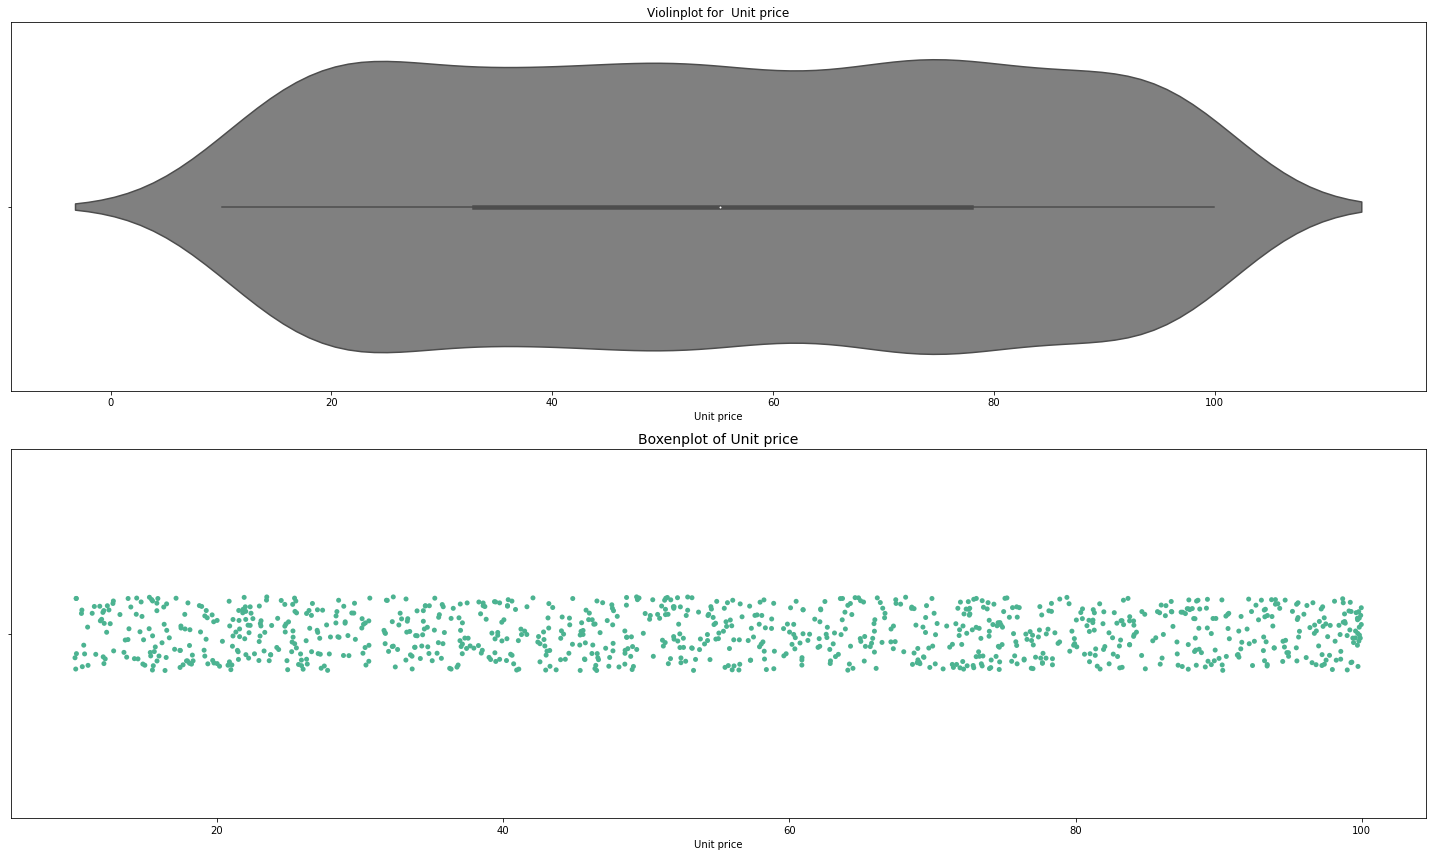

In [24]:
univariate_quant('Unit price')

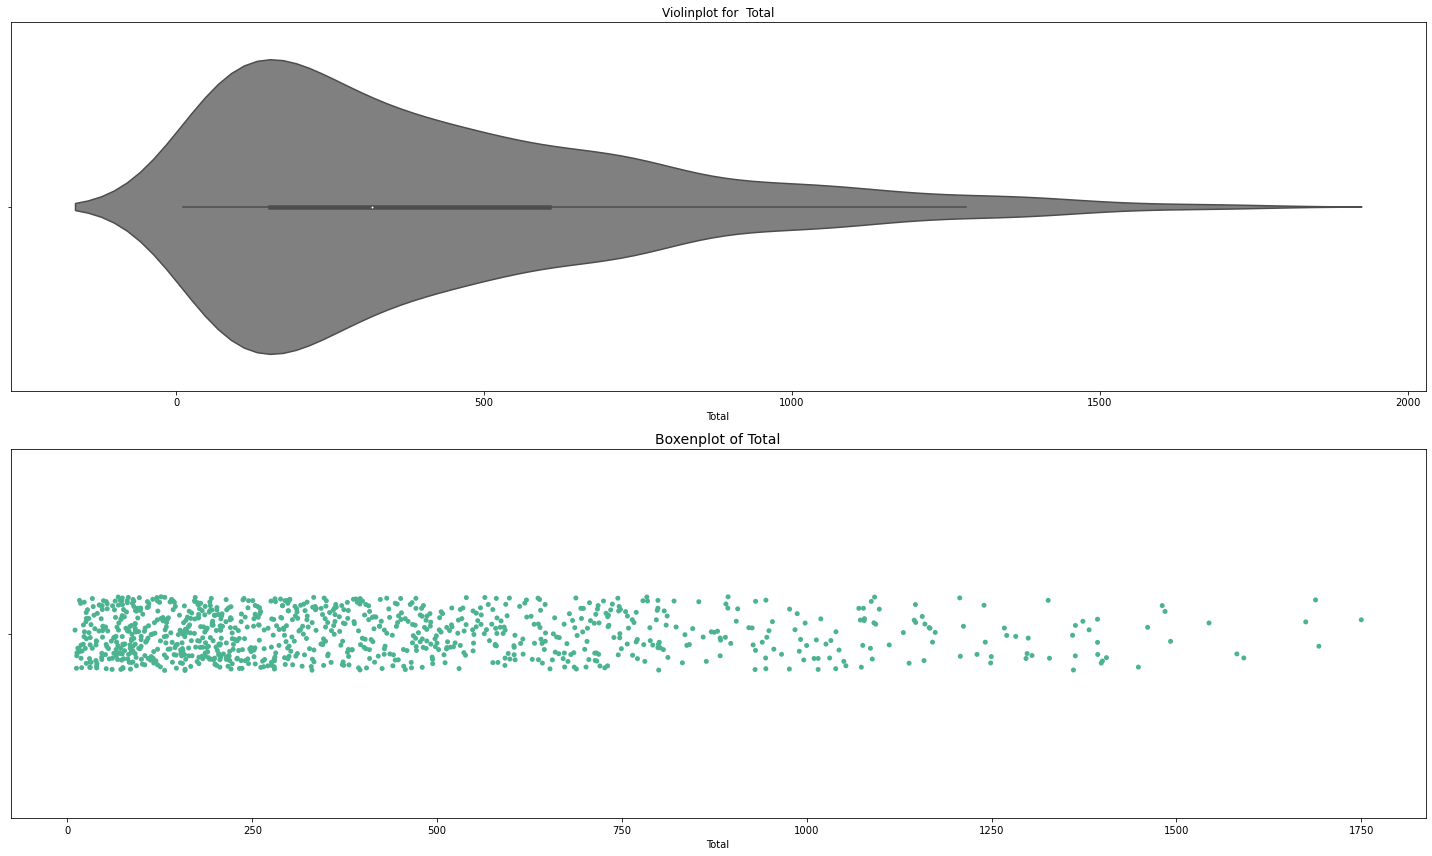

In [25]:
univariate_quant('Total')

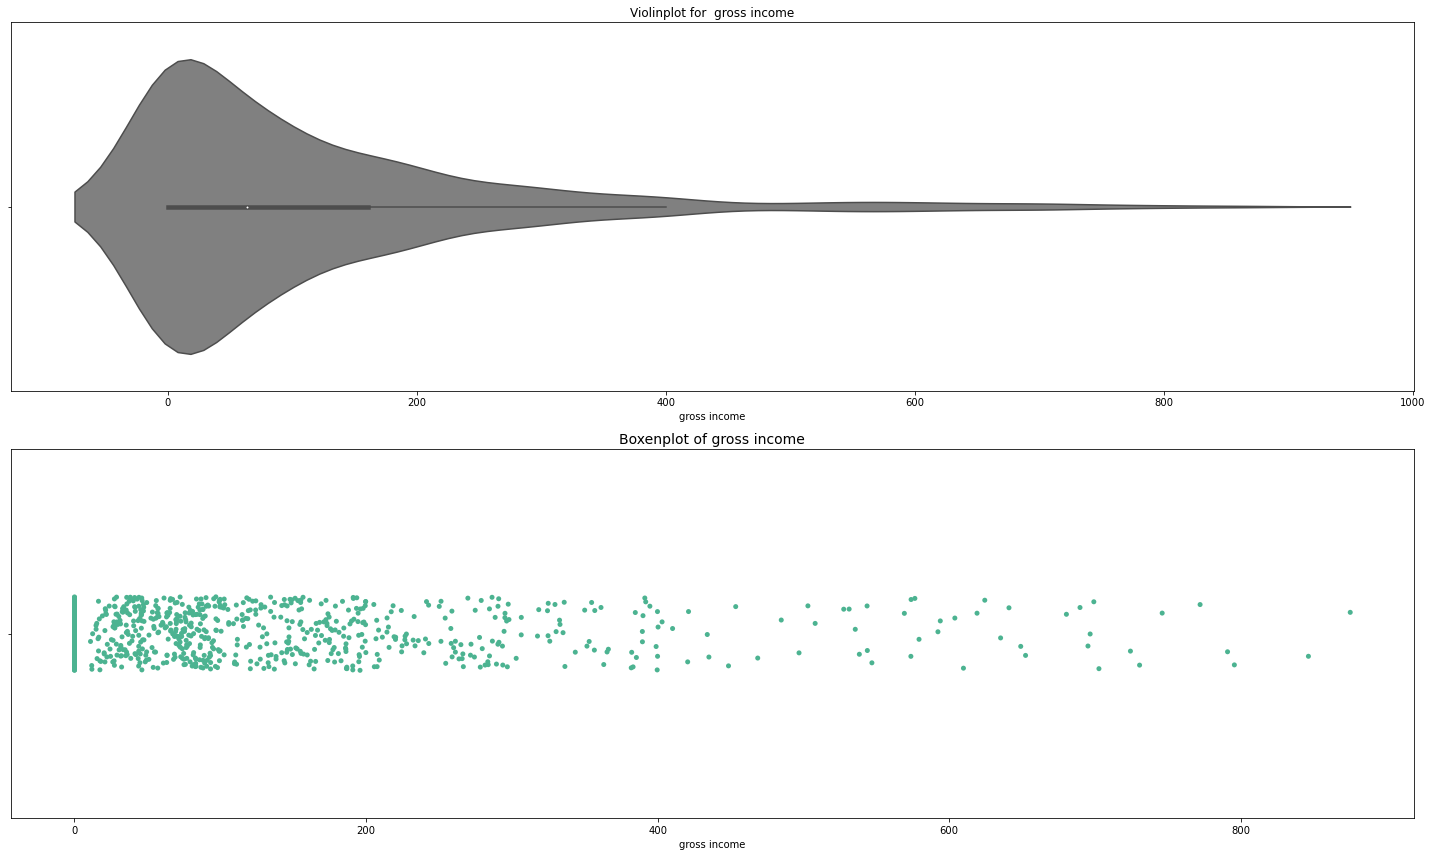

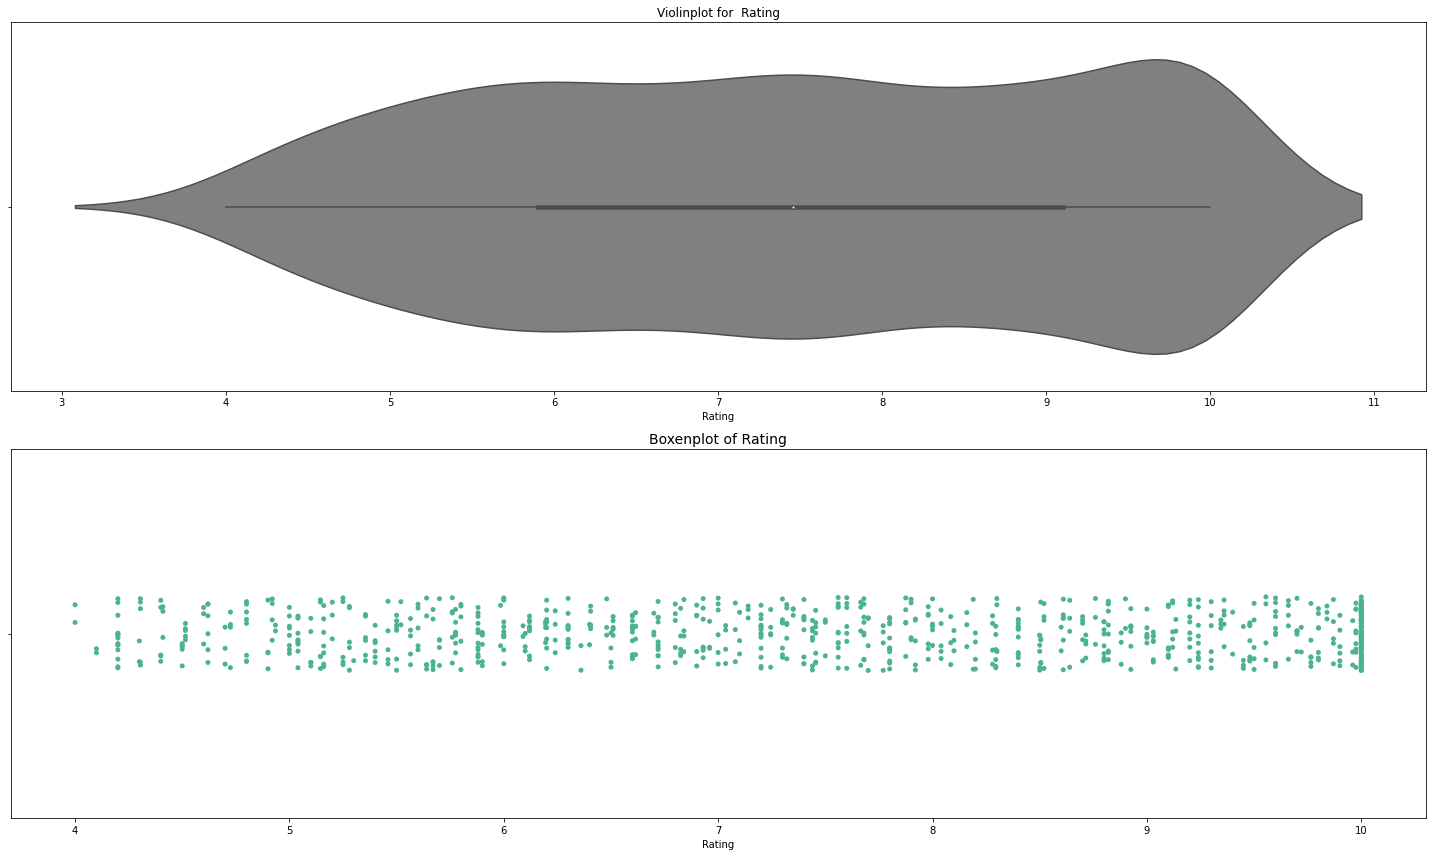

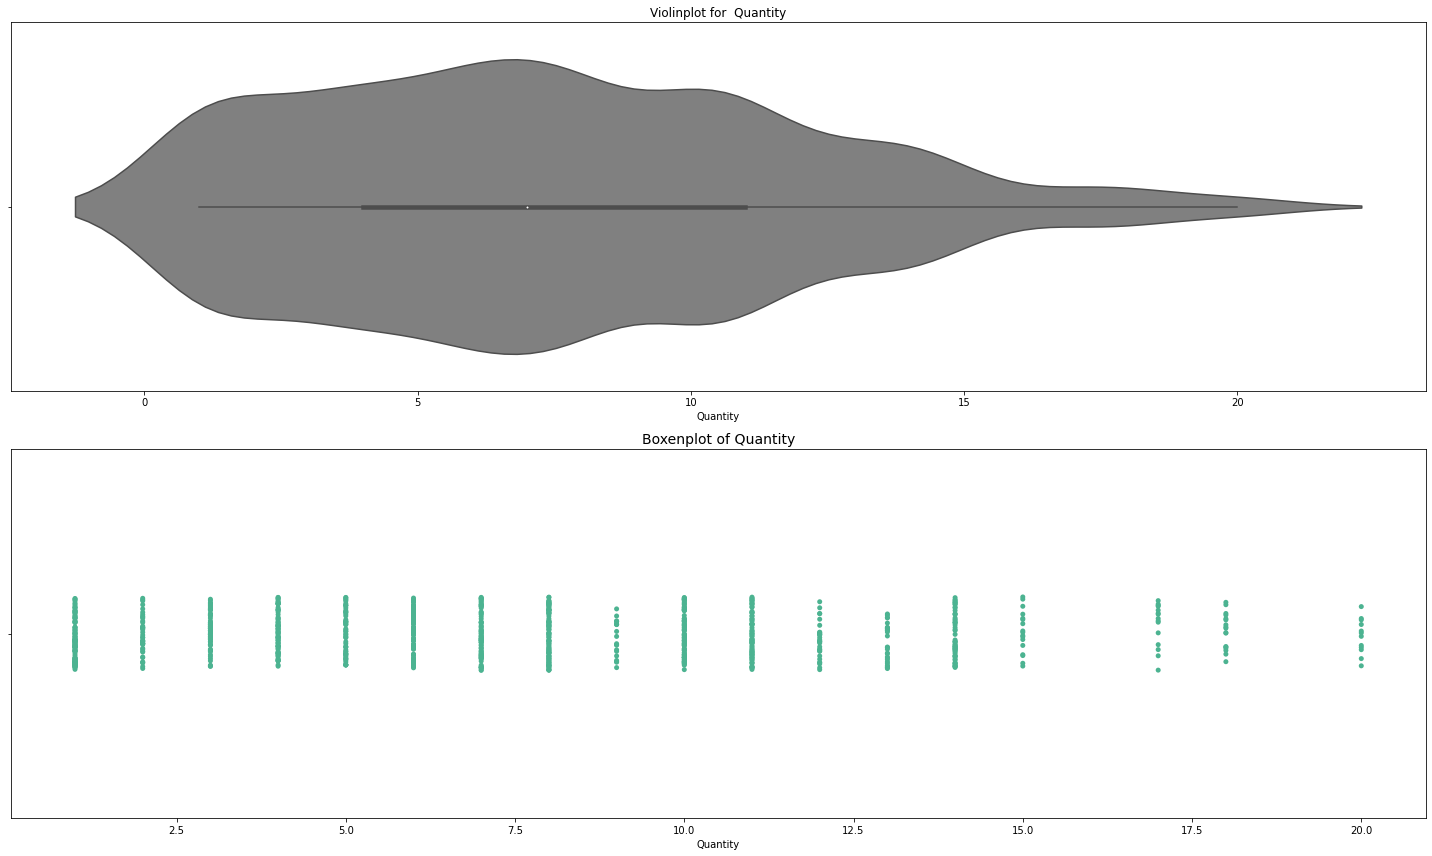

In [26]:
univariate_quant('gross income')
univariate_quant('Rating')
univariate_quant('Quantity')









In [27]:
# Defining function for Univariate Analysis of Quantitative Variables

def univariate_quant(col,hue=None):

    fig, axes=plt.subplots(nrows =2,ncols=1,figsize=(20,12))                     # Defining 2 subplots, changing fig size
    axes[1].set_title( "Boxenplot of "+ col , size =14)                          # Chart title for Subplot 1
    sns.stripplot(sales_data_2[col],ax=axes[1], color="#4CB391")                 # Distplot in subplot 1


    axes[0].set_title("Violinplot for  " + col )                                 #  Title for Subplot 2
    sns.violinplot(sales_data_2[col],ax=axes[0], color="grey")                   # Violinplot in Subplot 2
    
                      
    plt.tight_layout()
    fig.savefig("univariate_"+col+".png")


# qualitative analysis begin

<AxesSubplot:>

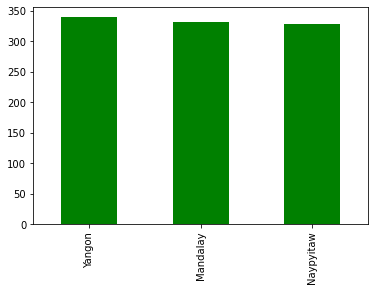

In [28]:
df1['City'].value_counts().head(10).plot.bar(color = 'g')

<AxesSubplot:>

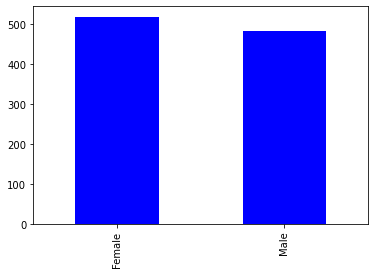

In [29]:
df1['Gender'].value_counts().head(10).plot.bar(color = 'b')

<AxesSubplot:>

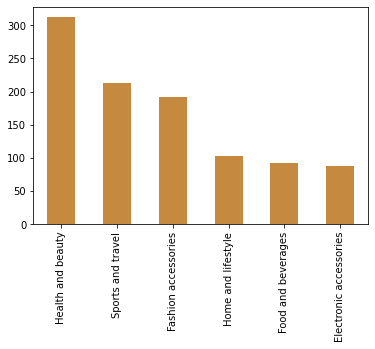

In [30]:
df1['Product line'].value_counts().head(10).plot.bar(color = '#C58940')

<AxesSubplot:>

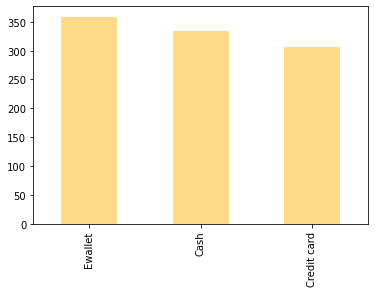

In [31]:
df1['Payment'].value_counts().head(10).plot.bar(color = '#FFDB89')

<AxesSubplot:>

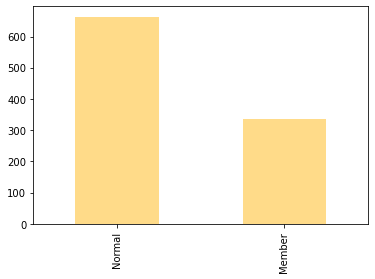

In [32]:
df1['Customer type'].value_counts().head(10).plot.bar(color = '#FFDB89')

# Unique Customers who are Member/Non-Members

  Customer type  CustomerID
0        Member         248
1        Normal         365


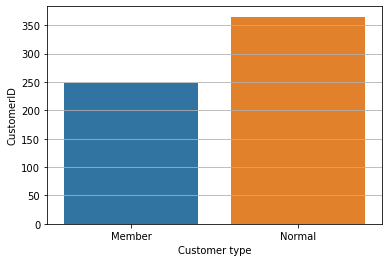

In [33]:
customer_members = sales_data_2[['CustomerID','Customer type']].groupby(['Customer type'], as_index = False).nunique()
print(customer_members)
plt.grid()
_=sns.barplot(x=customer_members["Customer type"], y='CustomerID',data=customer_members,)


In [34]:
#Stores Location on map
Cities_geo = df1[['City','Longitude','Latitude']].drop_duplicates()
Cities_geo


,City,Longitude,Latitude
0,Yangon,96.1735,16.8409
1,Naypyitaw,96.0785,19.7633
9,Mandalay,96.0891,21.9588


In [35]:
geo_map = folium.Map(location =[16.8409,96.1735], zoom_start = 5, tiles = 'CartoDB Positron', control_scale = True)

for (i, j) in Cities_geo.iterrows():
  folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['City'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(geo_map)


geo_map

# Heatmap


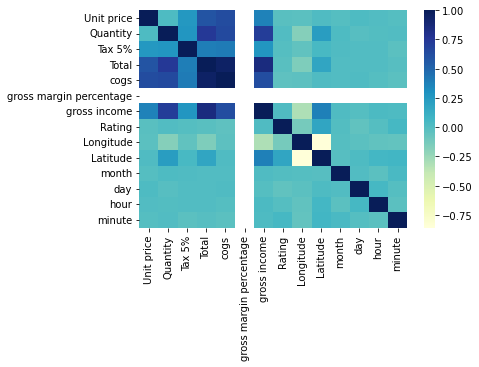

In [36]:
heatmap_data = df1.corr()
_=sns.heatmap(heatmap_data,cmap ='YlGnBu' )

In [37]:
# Defining function for Univariate Analysis of Quantitative Variables

def grouped_analysis(col,hue=None):
    
    plt.figure(figsize=(20,10))
    
    def custom_fmt(x):                                                     # Custom format function to show values in pie chart
        return '{:.0f}%\n({:.0f})'.format(x, sales_grouped['Total'].sum()*x/100)  # It is used in autopct parameter in pie chart

    
    sales_grouped= sales_data_2[[col,'Total']].groupby(col).sum()                # Sales grouped by col
    mean_ratings = sales_data_2[[col,'Rating']].groupby(col).mean()              # Avg ratings grouped by col
    aov  = sales_data_2[[col,'Total']].groupby(col).mean()                       # AOV by col
    mean_units_qty = sales_data_2[[col,'Quantity']].groupby(col).mean()          # Mean order qty by col

    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size
    axes[0,0].set_title("Sales by " + col , size = 25)                            # Chart title for Subplot 1
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)
   
    _=axes[0,0].pie(sales_grouped['Total'], labels = sales_grouped.index, autopct= custom_fmt,textprops={'fontsize': 14})


    axes[0,1].set_title("AOV by "  + col,size = 25 )                              #  Title for Subplot 2
    axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)    
    axes[0,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[0,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    g=sns.barplot(x=aov.index, y='Total', color="#f7a516",data=aov,ax=axes[0,1]) 
    g.set_xticklabels(
    labels=aov.index, rotation=45)                                                # Rotating lables so that they dont overlap
    
    
    axes[1,0].set_title("Mean Ratings by " + col,size = 25 )                      # Title for Subplot 3
    axes[1,0].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[1,0].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_ratings.index, x='Rating', color="#305cb0",data=mean_ratings,ax=axes[1,0],orient='h')

    
    axes[1,1].set_title("Mean Units Qty by " + col,size = 25 )                    # Title for Subplot 4
    axes[1,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[1,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_units_qty.index, x='Quantity', color="#712f80",data=mean_units_qty,ax=axes[1,1],orient='h')

    plt.tight_layout()
    fig.savefig("grouped_analysis"+col+".png")


<Figure size 1440x720 with 0 Axes>

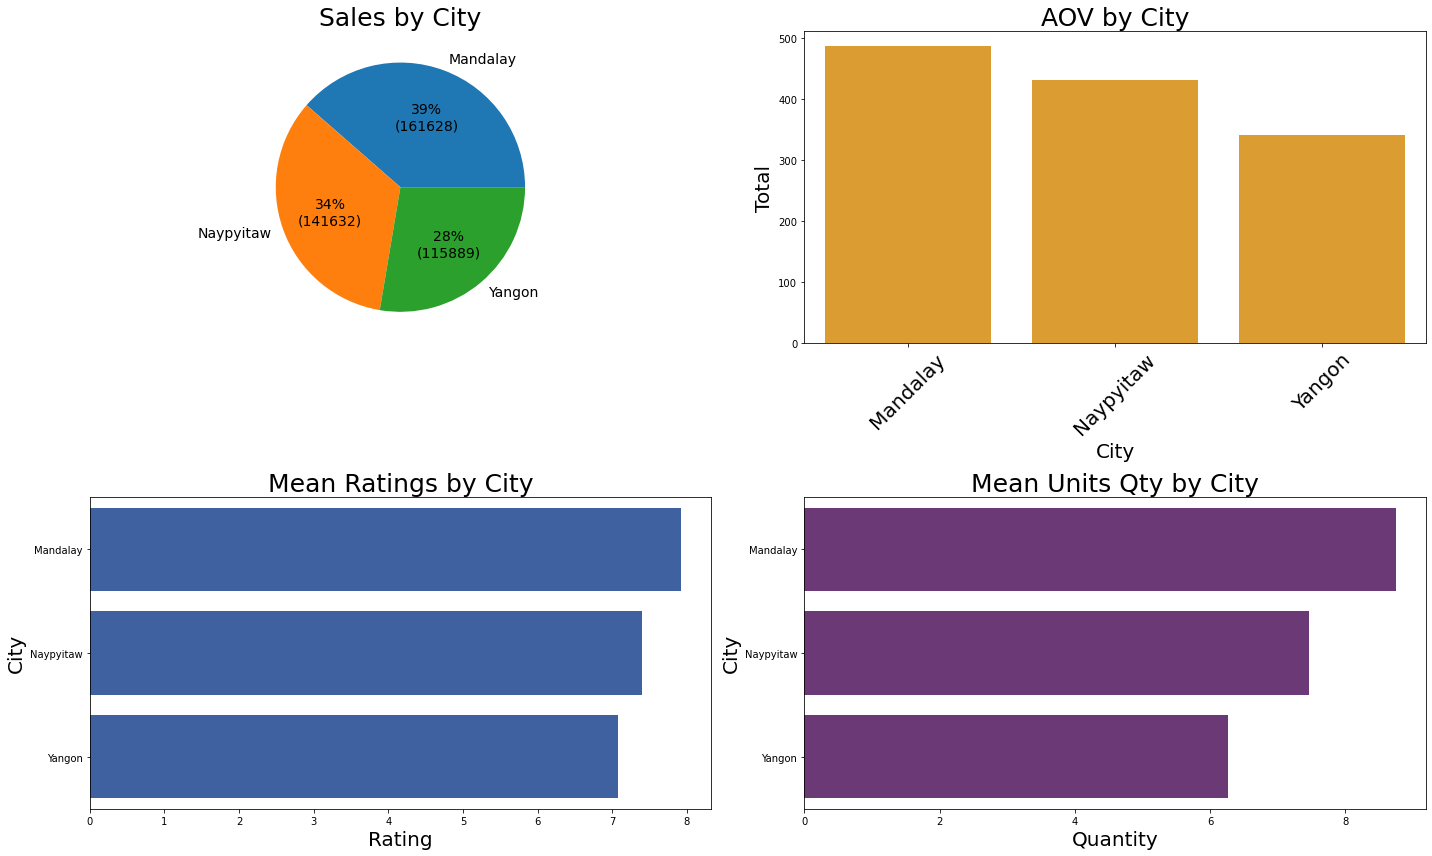

In [38]:
grouped_analysis('City')

<Figure size 1440x720 with 0 Axes>

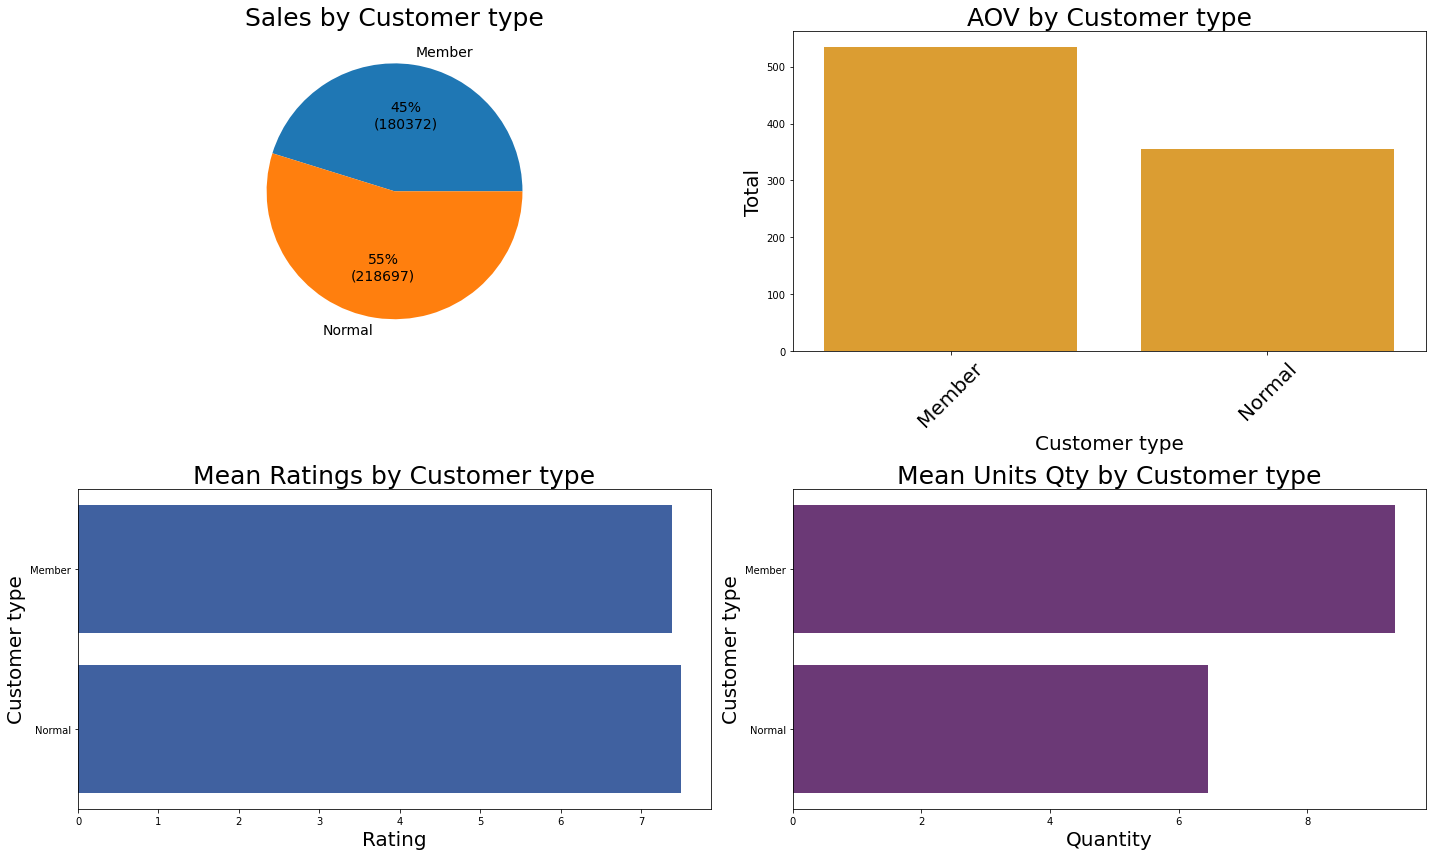

In [39]:
    grouped_analysis('Customer type')

<Figure size 1440x720 with 0 Axes>

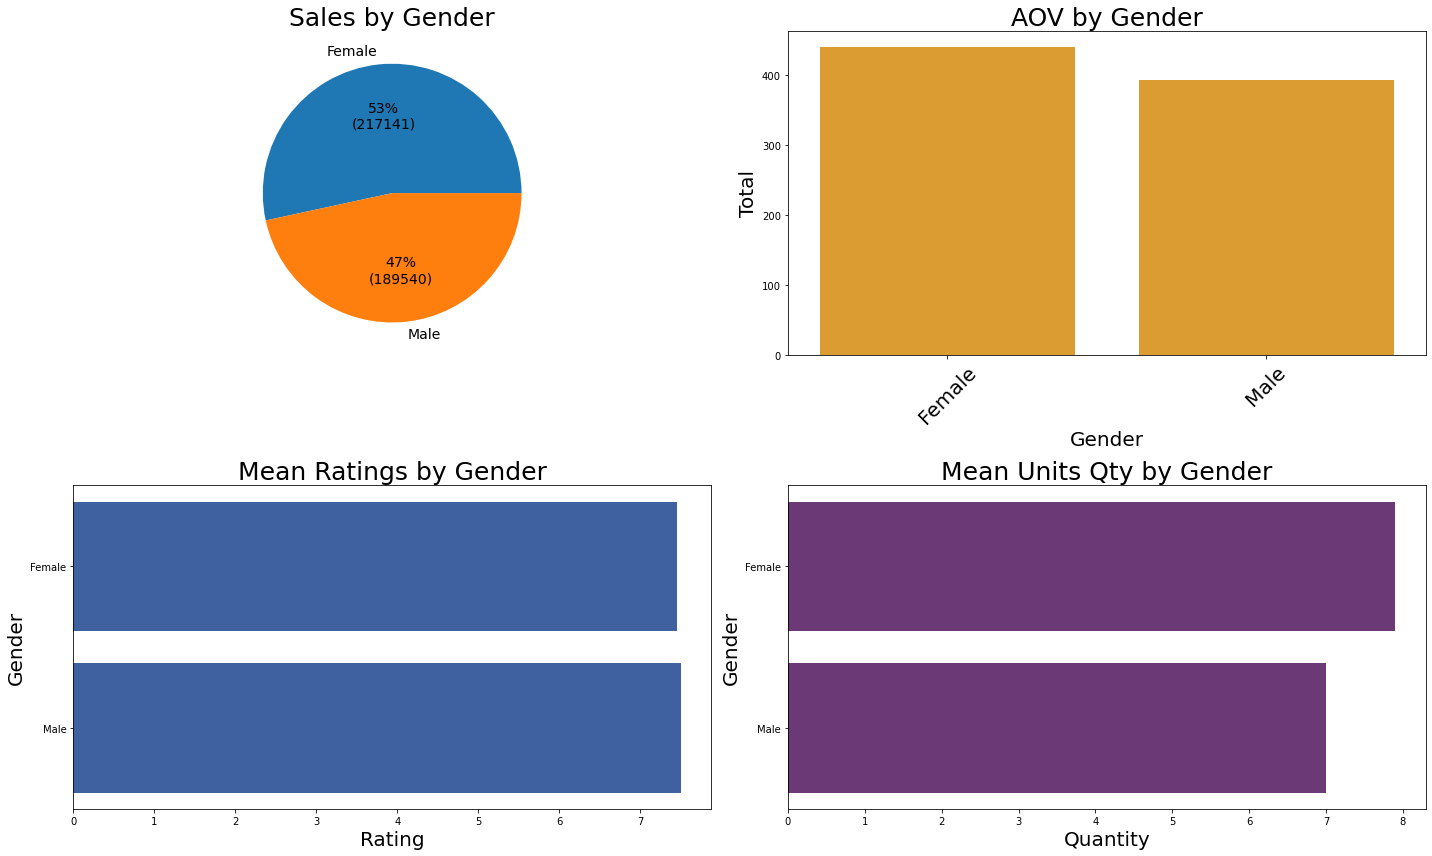

In [40]:
grouped_analysis('Gender')

<Figure size 1440x720 with 0 Axes>

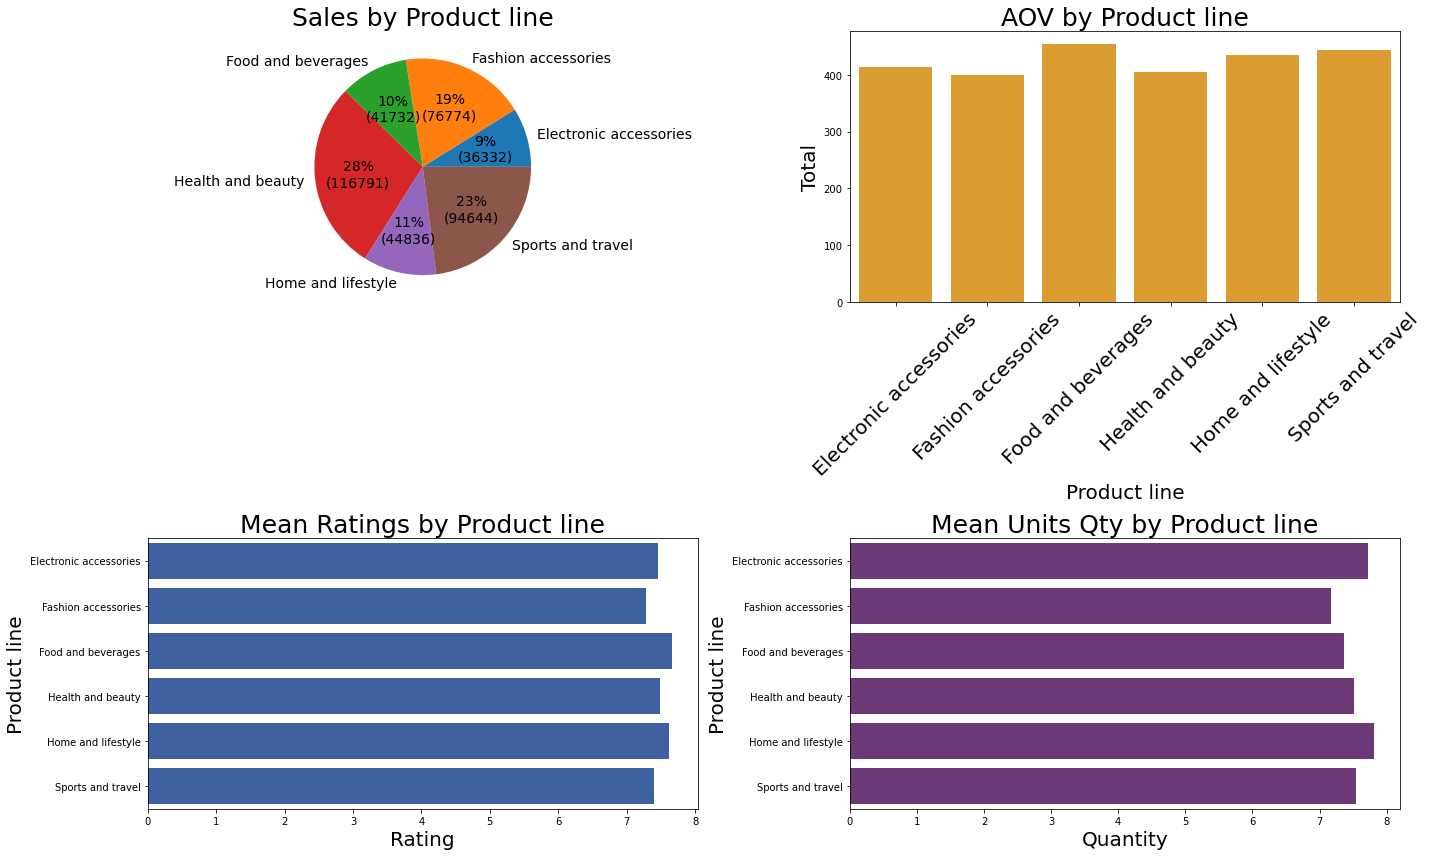

In [41]:
grouped_analysis('Product line')

<Figure size 1440x720 with 0 Axes>

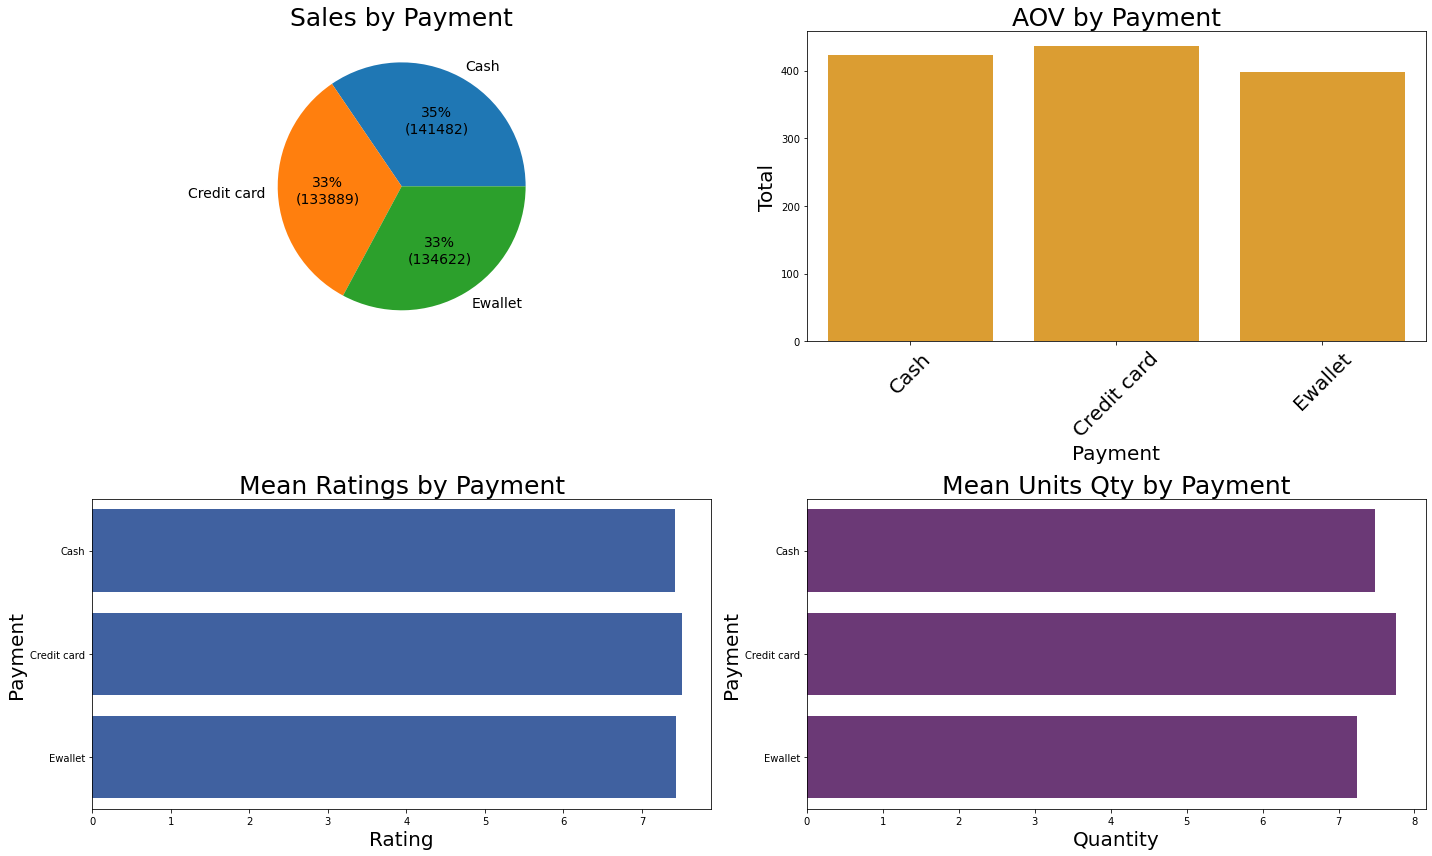

In [42]:
grouped_analysis('Payment')

# Time series Analysis

In [58]:
# Defining function for Univariate Analysis of Quantitative Variables

def timeseries_analysis(col,hue=None):
    
    plt.figure(figsize=(20,10))
    
    sales_grouped= df1[[col,'Total']].groupby(col).sum()              # Sales grouped by col
    mean_ratings = df1[[col,'Rating']].groupby(col).mean()            # Avg ratings grouped by col
    aov  = df1[[col,'Total']].groupby(col).mean()                      # AOV by col
    mean_units_qty = df1[[col,'Quantity']].groupby(col).mean()         # Mean order qty by col


    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size
     
    
    axes[0,0].set_title("Sales by " + col , size = 25)                            # Chart titl for Subplot 1
    sns.lineplot(x=sales_grouped.index , y= sales_grouped['Total'], data=sales_grouped, ax=axes[0,0])


    axes[0,1].set_title("AOV by "  + col,size = 25 )                              #  Title for Subplot 2
    axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), fontsize=20)    
    axes[0,1].set_xlabel( axes[0,1].get_xticklabels(),fontsize=20)
    axes[0,1].set_ylabel( axes[0,1].get_yticklabels(),fontsize=20)
    sns.barplot(x=aov.index, y='Total', color="#f7a516",data=aov,ax=axes[0,1])    
    
    
    axes[1,0].set_title("Mean Ratings by " + col,size = 25 )                      # Title for Subplot 3
    axes[1,0].set_xlabel( axes[1,0].get_xticklabels(),fontsize=20)
    axes[1,0].set_ylabel( axes[1,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_ratings.index, x='Rating', color="#305cb0",data=mean_ratings,ax=axes[1,0],orient='h')

    
    axes[1,1].set_title("Mean Units Qty by " + col,size = 25 )                    # Title for Subplot 4
    axes[1,1].set_xlabel( axes[1,1].get_xticklabels(),fontsize=20)
    axes[1,1].set_ylabel( axes[1,1].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_units_qty.index, x='Quantity', color="#712f80",data=mean_units_qty,ax=axes[1,1],orient='h')

    plt.tight_layout()
    fig.savefig("timeseries_analysis"+col+".png")

<Figure size 1440x720 with 0 Axes>

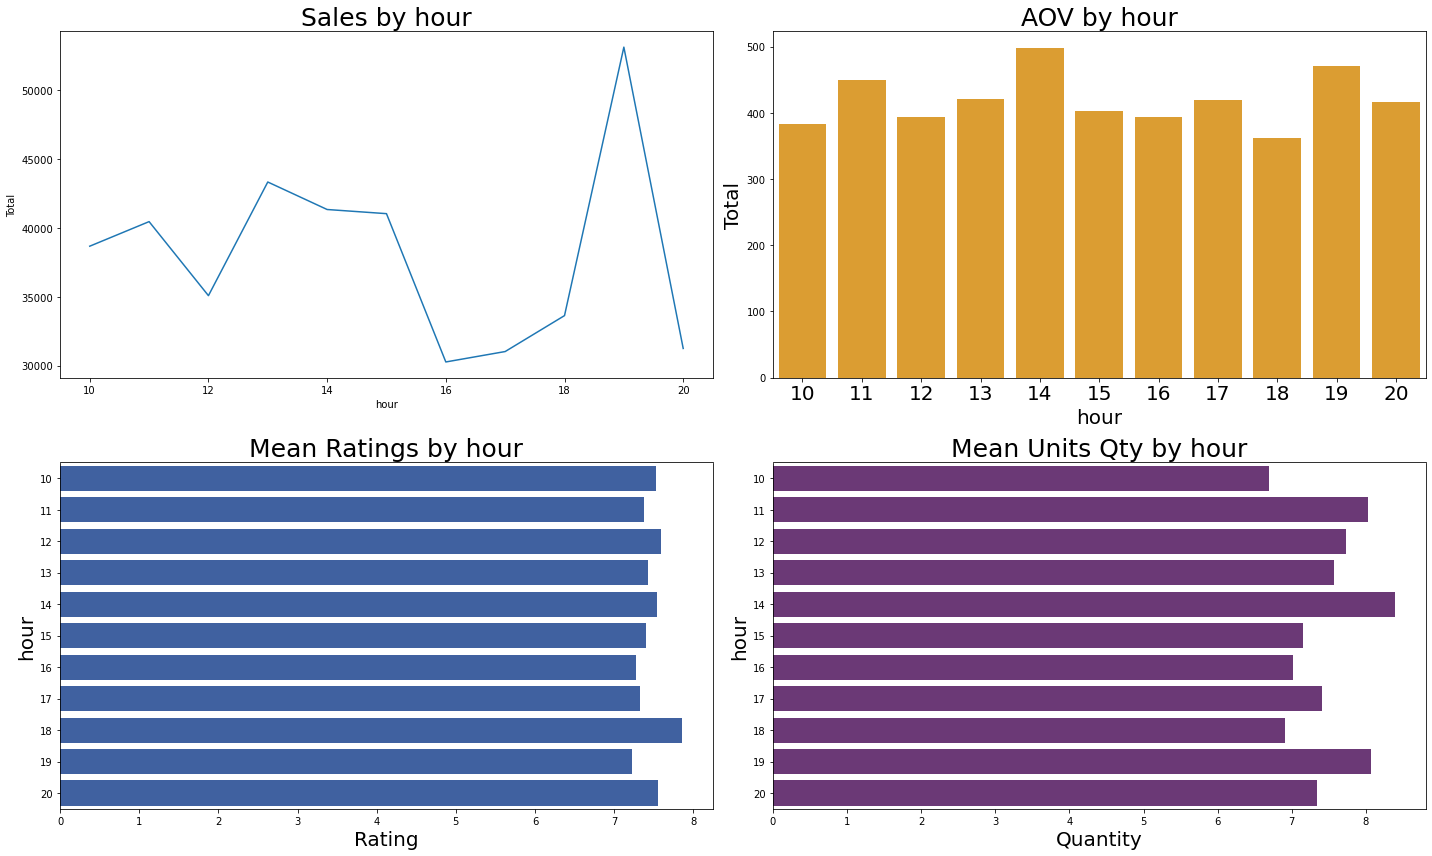

In [59]:
timeseries_analysis('hour')

<Figure size 1440x720 with 0 Axes>

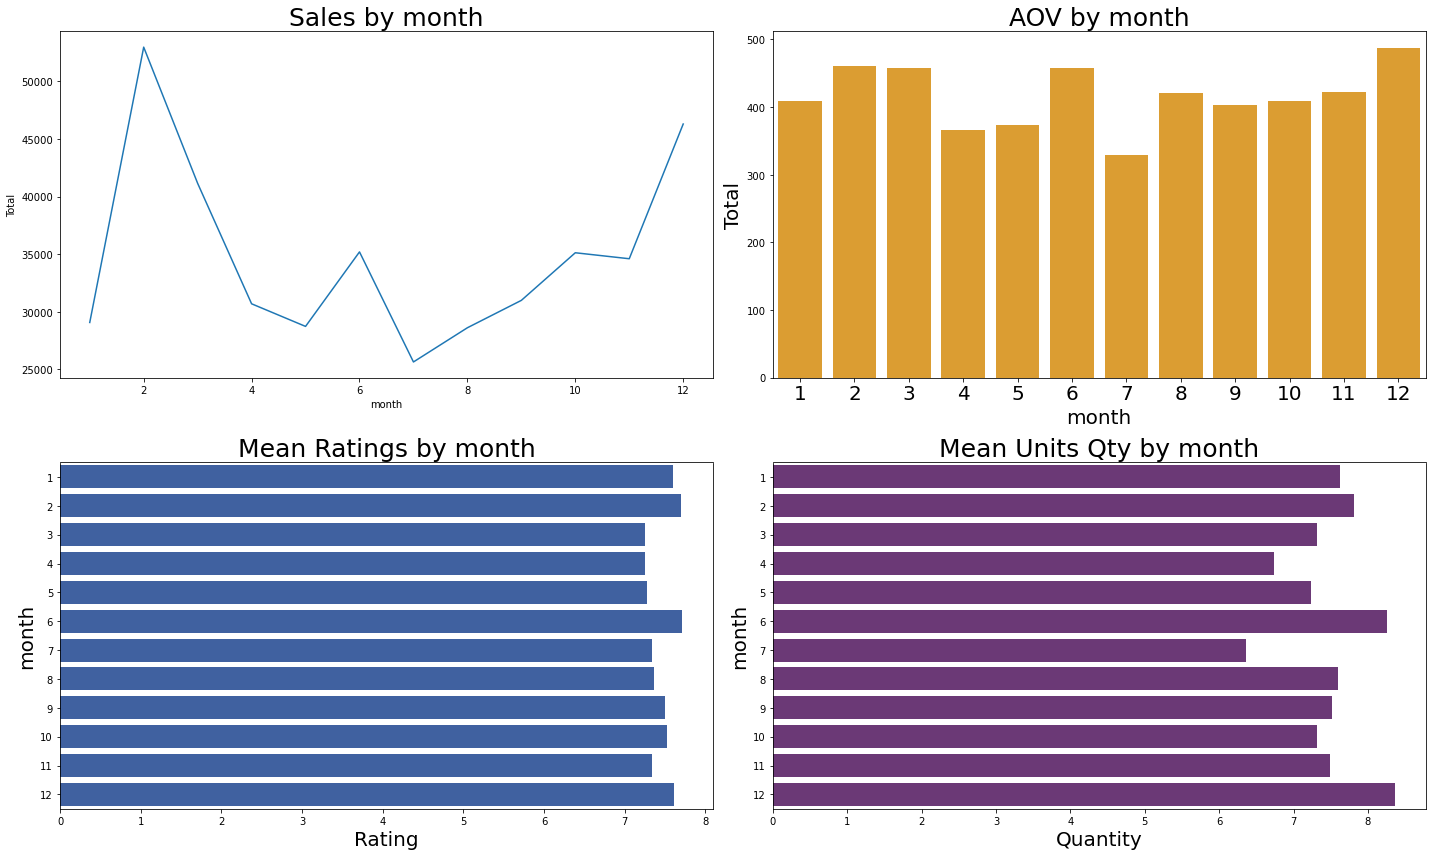

In [60]:
timeseries_analysis('month')

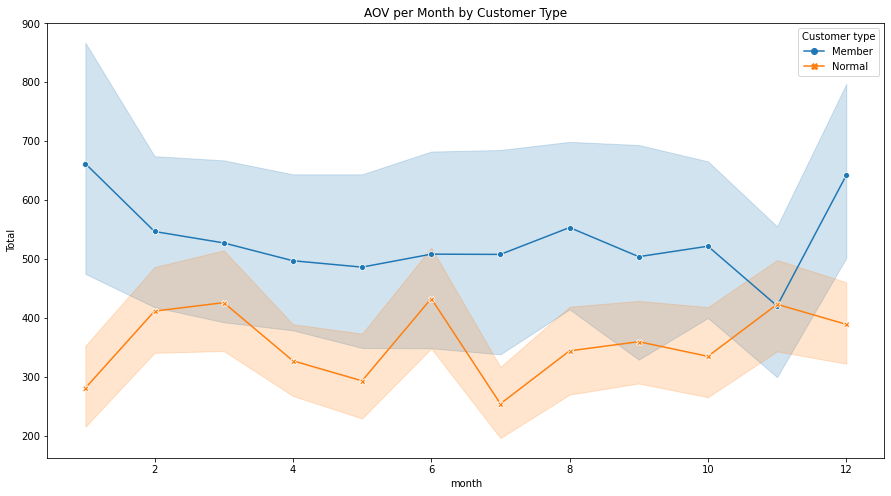

In [62]:
plt.figure(figsize=(15,8))
plt.title('AOV per Month by Customer Type')
sns.lineplot(data=df1,x='month',y='Total',hue='Customer type',markers=True,style='Customer type',dashes=False);


# Customers across Cities

<Figure size 1080x576 with 0 Axes>

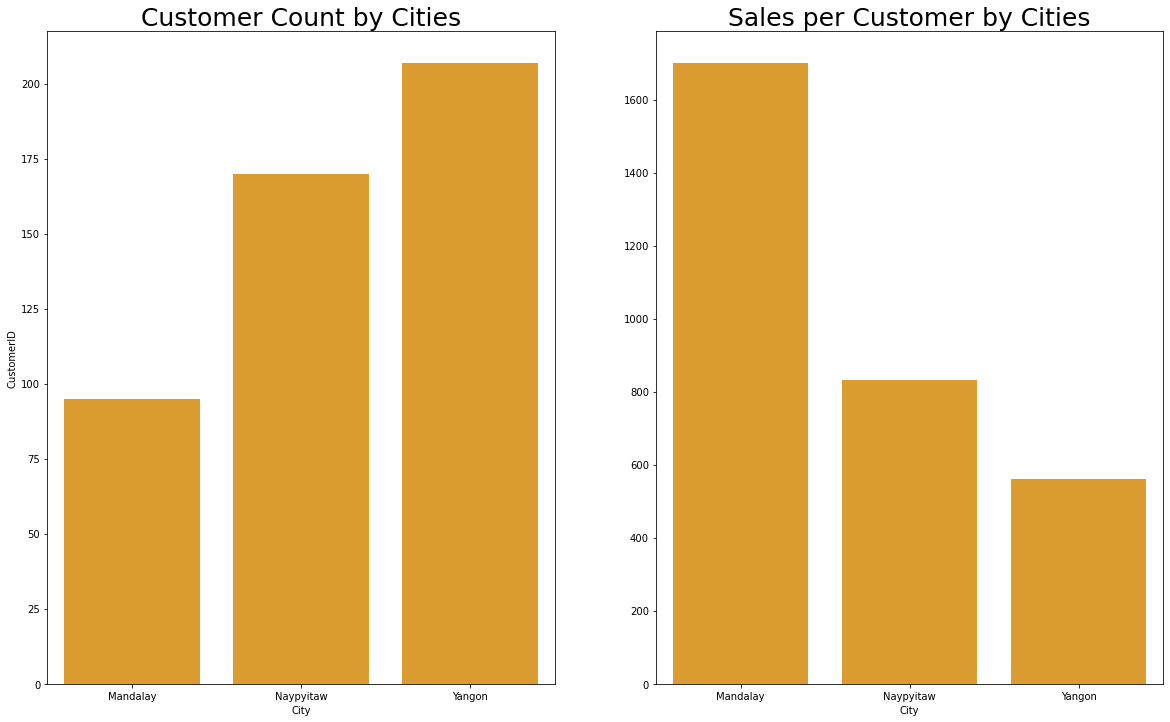

In [64]:
plt.figure(figsize=(15,8))						
						
customer_city = sales_data_2[['City', 'CustomerID']].groupby(['City']).nunique()						
sales_city= sales_data_2[["City",'Total']].groupby("City").sum()						
sales_per_cx = sales_city["Total"]/customer_city["CustomerID"]						
						
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,12)) # Defining 4 subplots, changing fig size						
						
sns.barplot(x=customer_city.index, y='CustomerID', color="#f7a516",data=customer_city,ax=ax[0])						
_=ax[0].set_title("Customer Count by Cities", size = 25) # Chart titl for Subplot 1						
						
						
sns.barplot(x=customer_city.index, y=sales_per_cx.values, color="#f7a516",ax=ax[1])						
_=ax[1].set_title("Sales per Customer by Cities", size = 25) # Chart title for Subplot 2						

# Member/Non-Member Deep Dive

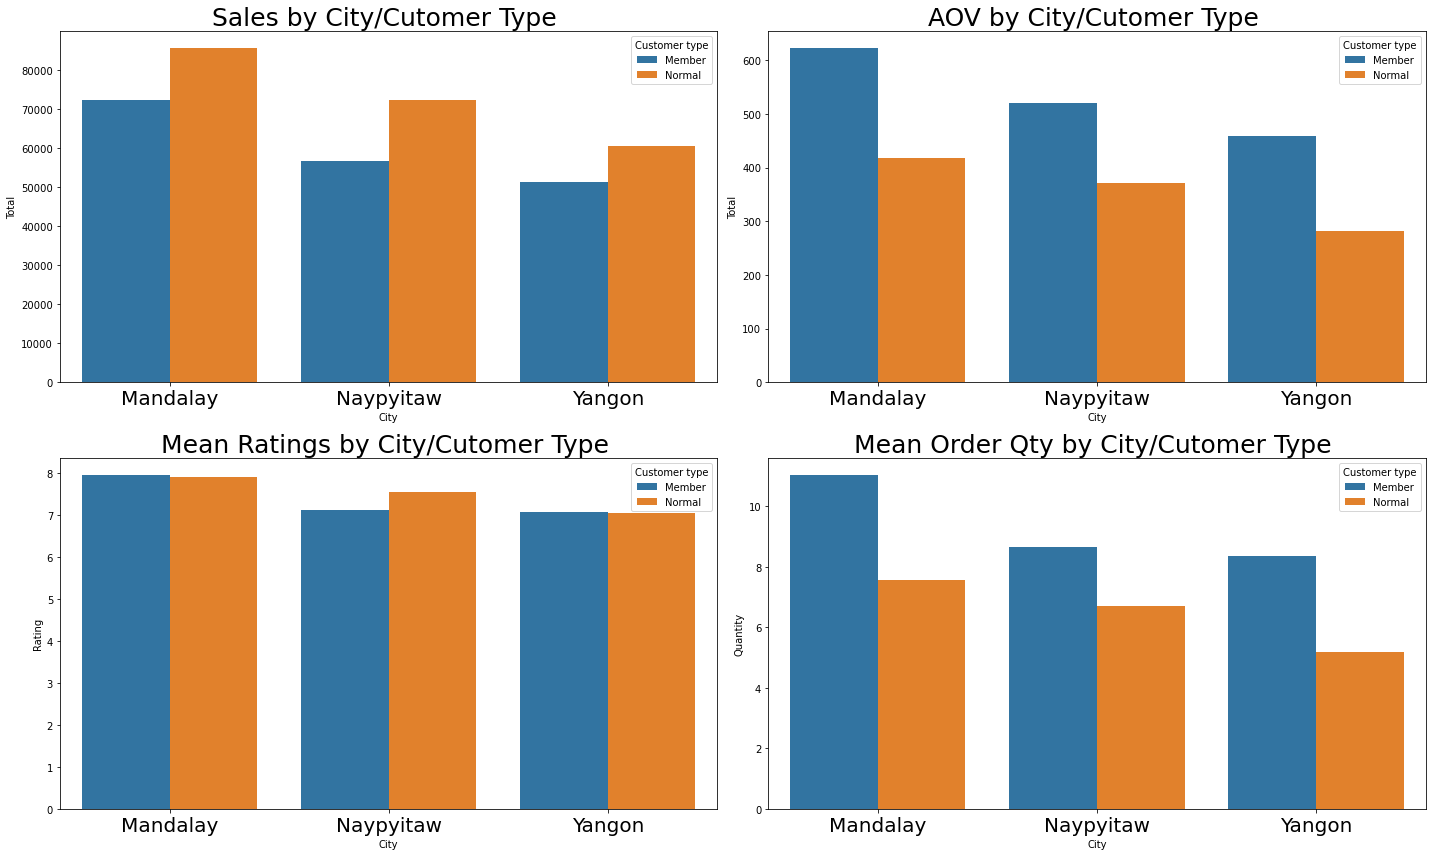

In [66]:
sales_grouped= sales_data_2[["City","Customer type",'Total']].groupby(["City","Customer type"], as_index = False).sum()							
mean_ratings = sales_data_2[["City","Customer type",'Rating']].groupby(["City","Customer type"], as_index = False).mean()							
aov = sales_data_2[["City","Customer type",'Total']].groupby(["City","Customer type"], as_index = False).mean()							
mean_units_qty = sales_data_2[["City",'Customer type','Quantity']].groupby(["City","Customer type"], as_index = False).mean()							
fig,axes= plt.subplots(nrows =2,ncols=2,figsize=(20,12))							
_=sns.barplot(x=sales_grouped["City"], y='Total',data=sales_grouped,hue = 'Customer type', ax = axes[0,0])							
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)							
axes[0,0].set_title("Sales by City/Cutomer Type " , size = 25)							
_=sns.barplot(x=aov["City"], y='Total',data=aov,hue = 'Customer type', ax = axes[0,1])							
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), fontsize=20)							
axes[0,1].set_title("AOV by City/Cutomer Type " , size = 25)							
_=sns.barplot(x=mean_ratings["City"], y='Rating',data=mean_ratings,hue = 'Customer type', ax = axes[1,0])							
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), fontsize=20)							
axes[1,0].set_title("Mean Ratings by City/Cutomer Type " , size = 25)							
_=sns.barplot(x=mean_units_qty["City"], y='Quantity',data=mean_units_qty,hue = 'Customer type', ax = axes[1,1])							
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), fontsize=20)							
axes[1,1].set_title("Mean Order Qty by City/Cutomer Type " , size = 25)							
							
plt.tight_layout()							